In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Libraries
import pandas
import numpy
import matplotlib.pyplot as plt

#Regression

There are total X features in the dataset, in which basically Value (yearly wheat yield) is our dependent feature, and the rest of them are our independent features

In [ ]:
#separate the other attributes from the predicting attribute
x_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_train.csv')
#separte the predicting attribute into Y for model training
y_train = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_train.csv')
features = ['whc', 'silt', 'silt', 'clay',	'om',	'kwfactor',	'kffactor',	'spH',
            'tfactor',	'Yearly Precipitation',	'Yearly Average Temperature','Value of Previous Year']
target = ['Value']
#x_train = x_train[features]
#y_train = y_train[target]

In [ ]:
x_train.head()

,Unnamed: 0,whc,sand,silt,clay,om,kwfactor,kffactor,spH,tfactor,Yearly Precipitation,Yearly Average Temperature,Value of Previous Year,Crossed Soil Composition,Crossed Weather,CountryBit_0,CountryBit_1,CountryBit_2,CountryBit_3,CountryBit_4,CountryBit_5,CountryBit_6,CountyBit_0,CountyBit_1,CountyBit_2,CountyBit_3,CountyBit_4,CountyBit_5,CountyBit_6,CountyBit_7,CountyBit_8,CountyBit_9
0,24943,0.181880,0.397311,0.430527,0.172162,-0.847789,0.295687,0.356020,0.558575,-0.740875,-1.054869,-2.032212,-0.318771,0.029449,2.143717,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1
1,81428,0.192548,0.189221,0.471754,0.339025,-0.415745,0.204280,0.341282,0.381202,-0.455062,1.227253,0.854910,-0.219894,0.030263,1.049191,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
2,39844,0.311578,0.105140,0.622309,0.272551,-1.063260,0.481229,0.481229,0.401204,0.654242,0.977189,1.578179,-0.134201,0.017833,1.542179,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1
3,59215,0.303364,0.186711,0.436038,0.377251,-0.426915,0.233332,0.310399,0.583156,0.157146,-0.779272,1.474515,-1.070232,0.030713,-1.149048,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1
4,15314,0.222757,0.477533,0.303415,0.219052,-0.930592,0.306882,0.312692,0.568072,0.660503,-0.961751,-0.644058,-1.122966,0.031739,0.619424,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
y_train.head()

,Unnamed: 0,Value
0,24943,23.5
1,81428,35.7
2,39844,45.1
3,59215,22.5
4,15314,13.5


##Splitting Data
Now, we have to split the data into training and testing parts for that we use the scikit-learn train_test_split() function.

In [ ]:
# importing train_test_split from sklearn
#from sklearn.model_selection import train_test_split
# splitting the data
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

##Applying model
Now, we apply the linear regression model to our training data, first of all, we have to import linear regression from the scikit-learn library

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(numpy.nan_to_num(x_train),y_train)

LinearRegression()

finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of profit.

In [ ]:
x_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/X_test.csv')
#x_test = x_test[features]
y_test = pandas.read_csv(r'/content/drive/My Drive/CMPS_276/final_data/Y_test.csv')
#y_test=y_test[target]
y_prediction =  LR.predict(numpy.nan_to_num(x_test))
y_prediction

array([[8.58940000e+04, 4.65851672e+01],
       [4.46950000e+04, 2.77371817e+01],
       [3.51960000e+04, 2.18821770e+01],
       ...,
       [5.22300000e+04, 2.85904799e+01],
       [4.84030000e+04, 3.70951435e+01],
       [4.71860000e+04, 3.35231053e+01]])

Now, we have to compare the y_prediction values with the original values because we have to calculate the accuracy of our model, which is implemented by r2_score. r2_score value ranges from 0 to 1.

In [ ]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',numpy.sqrt(mean_squared_error(y_test,y_prediction)))

r2 score is  0.8694471843647684
mean_sqrd_error is== 30.188095165174424
root_mean_squared error of is== 5.494369405598283


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes=numpy.linspace(0.01, 1.0, 50)

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = numpy.nan_to_num(x_train),
y = y_train,
train_sizes = train_sizes,
cv = 10,
scoring = 'neg_mean_squared_error')

In [ ]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pandas.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pandas.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 628      26.661139
1897     29.492696
3167     29.554023
4436     29.355996
5705     29.385785
6975     29.092105
8244     28.860062
9513     29.018998
10783    29.199125
12052    29.279390
13322    29.312146
14591    29.335360
15860    29.459422
17130    29.642879
18399    29.813447
19669    29.876306
20938    29.911779
22207    29.916429
23477    29.999609
24746    30.023461
26015    29.968860
27285    29.967170
28554    30.039092
29824    30.139755
31093    30.136301
32362    30.114812
33632    30.114309
34901    30.184822
36170    30.201794
37440    30.190808
38709    30.145475
39979    30.163329
41248    30.158166
42517    30.314555
43787    30.306808
45056    30.326802
46326    30.281714
47595    30.280829
48864    30.310704
50134    30.319233
51403    30.347976
52672    30.324212
53942    30.341445
55211    30.330426
56481    30.286847
57750    30.258221
59019    30.263986
60289    30.260478
61558    30.270418
62828    30.232039
dtype: float64

 ----------

(0.0, 40.0)

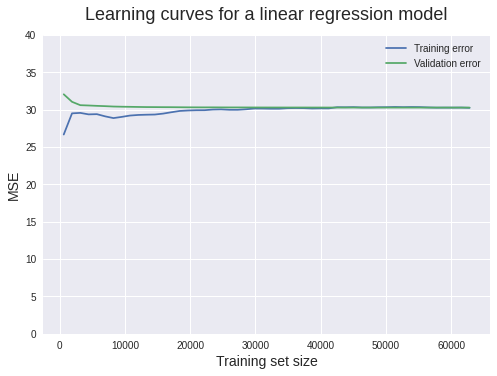

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

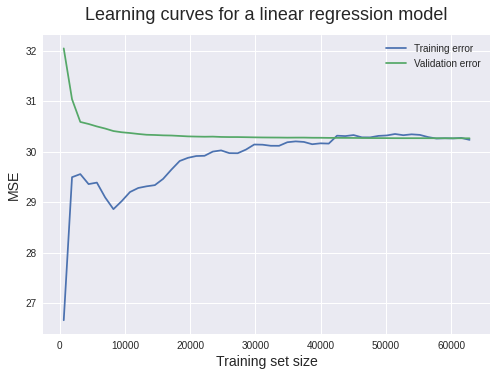

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.ylim(0,40)

In [ ]:
# function to plot the learning curves
import numpy as np

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1)

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='r2',
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

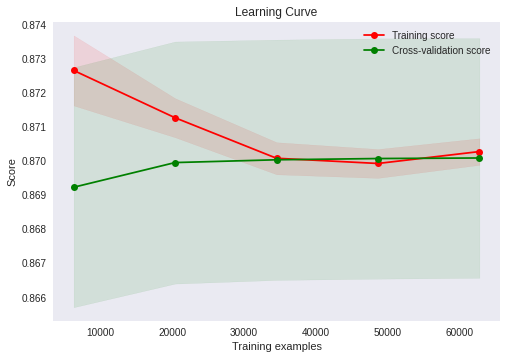

In [ ]:
# plot the learning curve of our XXXXX model

from sklearn.model_selection import GridSearchCV, RepeatedKFold, learning_curve
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

plot_learning_curve(LinearRegression(), "Learning Curve", numpy.nan_to_num(x_train), y_train, axes=None, ylim=None, cv=cv, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5))

#Regression Tree

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

sns.set()

In [ ]:
#Let’s train our model using the Scikit-learn DecisionTreeRegressor class.
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
dtr1 = DecisionTreeRegressor(max_depth=2,
                             random_state=1)

# fit the regressor with X and Y data
dtr1.fit(numpy.nan_to_num(x_train), y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [ ]:
x_train.columns

Index(['Unnamed: 0', 'whc', 'sand', 'silt', 'clay', 'om', 'kwfactor',
       'kffactor', 'spH', 'tfactor', 'Yearly Precipitation',
       'Yearly Average Temperature', 'Value of Previous Year',
       'Crossed Soil Composition', 'Crossed Weather', 'CountryBit_0',
       'CountryBit_1', 'CountryBit_2', 'CountryBit_3', 'CountryBit_4',
       'CountryBit_5', 'CountryBit_6', 'CountyBit_0', 'CountyBit_1',
       'CountyBit_2', 'CountyBit_3', 'CountyBit_4', 'CountyBit_5',
       'CountyBit_6', 'CountyBit_7', 'CountyBit_8', 'CountyBit_9'],
      dtype='object')

KeyError: ignored

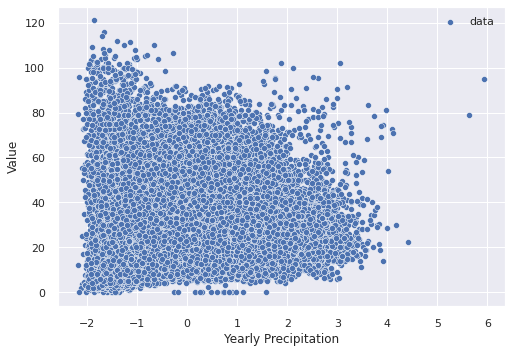

In [ ]:
sns.scatterplot(x=x_train['Yearly Precipitation'],
                y=y_train['Value'],
                label='data')

plt.plot(x_train['Yearly Precipitation'].sort_values(),
         dtr1.predict(x_train[x_train.columns].sort_values(by='weight').to_frame()),
         color='red', label='model',
         linewidth=2)

plt.legend()


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtr1, feature_names=x_train.columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

There are 4 leaf nodes in our tree. This is because we set max_depth=2. The number of leaf nodes is equivalent to 2^max_depth. The hyperparameter max_depth controls the complexity of branching.
In this case where max_depth=2, the model does not fit the training data very well. This is called the problem of underfitting.

When we create the best model, we should avoid both underfitting and overfitting conditions.
So, what is the best value for the hyperparameter max_depth? Finding out the optimum value (not too small or too large) for max_depth is called hyperparameter tuning.

we train the model using X_train, y_train and test it using X_test, y_test. This is done for different values of max_depth hyperparameter ranging from 1 to 20 and plot the testing error with the training error.

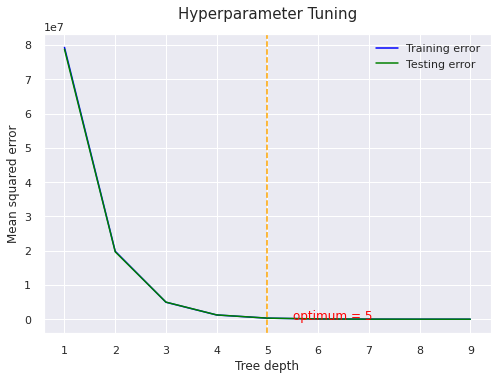

In [ ]:
from sklearn.metrics import mean_squared_error as mse
x = pandas.concat([x_train, x_test])
y = pandas.concat([y_train, y_test])
max_depths = range(1, 10)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(numpy.nan_to_num(x), y)
    training_error.append(mse(y, model_1.predict(numpy.nan_to_num(x))))

testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(numpy.nan_to_num(x_train), y_train)
    testing_error.append(mse(y_test, model_2.predict(numpy.nan_to_num(x_test))))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=5, color='orange', linestyle='--')
plt.annotate('optimum = 5', xy=(5.5, 1.2), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,8,9,10],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
from sklearn.model_selection import GridSearchCV

reg_decision_model=DecisionTreeRegressor()
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=10,verbose=3)

In [ ]:
x = pandas.concat([x_train, x_test])
y = pandas.concat([y_train, y_test])

tuning_model.fit(numpy.nan_to_num(x),y)

tuning_model.best_params_

Streaming output truncated to the last 5000 lines.
[CV 4/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-80007679.398 total time=   0.3s
[CV 5/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-78473698.725 total time=   0.3s
[CV 6/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-80452290.879 total time=   0.3s
[CV 7/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-79229753.102 total time=   0.3s
[CV 8/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fraction_leaf=0.3, splitter=best;, score=-79337918.228 total time=   0.3s
[CV 9/10] END max_depth=7, max_features=auto, max_leaf_nodes=90, min_samples_leaf=2, min_weight_fra

In [ ]:
tuning_model.best_score_

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [ ]:
tuned_hyper_model.fit(X_train,y_train)

In [ ]:
tuned_pred=tuned_hyper_model.predict(X_test)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

sns.set()

dtropt= DecisionTreeRegressor(max_depth=5,
                             random_state=1)

dtropt.fit(numpy.nan_to_num(x_train), y_train)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dtropt, feature_names=x_train.columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

In [ ]:
from sklearn.tree import export_graphviz
import graphviz


dtropt1= DecisionTreeRegressor(max_depth=12,
                             random_state=1)

dtropt1.fit(numpy.nan_to_num(x_train), y_train)

dot_data_n = export_graphviz(dtropt1, feature_names=x_train.columns,
                           filled=True, rounded=True)

graph = graphviz.Source(dot_data_n)
graph.render("treenew")

'treenew.pdf'

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes=np.linspace(0.01, 1.0, 50)

train_sizes_dec, train_scores_dec, validation_scores_dec = learning_curve(
# estimator = DecisionTreeRegressor(max_depth=12, random_state=1) ,
estimator = dtropt1,
X = numpy.nan_to_num(x_train),
y = y_train,
train_sizes = train_sizes,
cv = 10,
scoring = 'neg_mean_squared_error')

In [ ]:
train_scores_dec_mean = -train_scores_dec.mean(axis = 1)
validation_scores_dec_mean = -validation_scores_dec.mean(axis = 1)
print('Mean training scores\n\n', pandas.Series(train_scores_dec_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pandas.Series(validation_scores_dec_mean, index = train_sizes))

Mean training scores

 0.010000    -0.000000
0.030204     1.894782
0.050408     5.150397
0.070612     9.076141
0.090816    13.007723
0.111020    16.201585
0.131224    18.927462
0.151429    21.350770
0.171633    23.732746
0.191837    25.511347
0.212041    27.014021
0.232245    28.104170
0.252449    29.644260
0.272653    30.549591
0.292857    31.313673
0.313061    32.296625
0.333265    33.010004
0.353469    33.599599
0.373673    34.453202
0.393878    34.828379
0.414082    35.470606
0.434286    36.168568
0.454490    36.241933
0.474694    36.949732
0.494898    37.152353
0.515102    37.456877
0.535306    37.938698
0.555510    38.292526
0.575714    38.635186
0.595918    39.003827
0.616122    39.245268
0.636327    39.463821
0.656531    39.532563
0.676735    39.720408
0.696939    39.991312
0.717143    40.261587
0.737347    40.429020
0.757551    40.589036
0.777755    40.606566
0.797959    40.934960
0.818163    41.023889
0.838367    41.123226
0.858571    41.350129
0.878776    41.377662
0.898980 

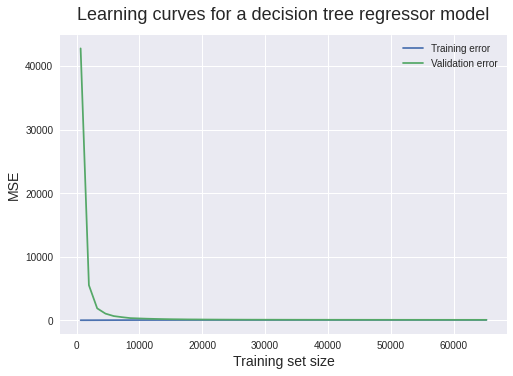

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes_dec, train_scores_dec_mean, label = 'Training error')
plt.plot(train_sizes_dec, validation_scores_dec_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree regressor model', fontsize = 18, y = 1.03)
plt.legend()
# plt.ylim(0,40)

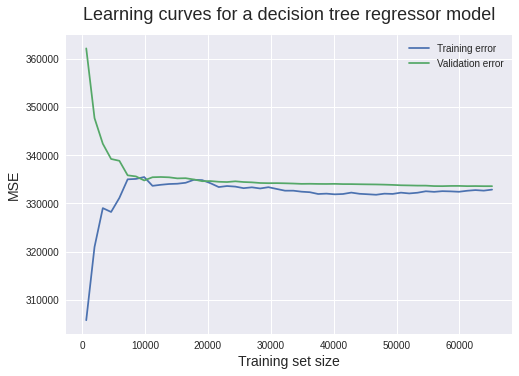

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes_dec, train_scores_dec_mean, label = 'Training error')
plt.plot(train_sizes_dec, validation_scores_dec_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a decision tree regressor model', fontsize = 18, y = 1.03)
plt.legend()
# plt.ylim(0,40)

In [ ]:
# import matplotlib.pyplot as plt

# plt.style.use('seaborn')
# plt.plot(train_sizes_dec, train_scores_dec_mean, label = 'Training error')
# plt.plot(train_sizes_dec, validation_scores_dec_mean, label = 'Validation error')
# plt.ylabel('MSE', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves for a decision tree regressor model', fontsize = 18, y = 1.03)
# plt.legend()
# plt.ylim(0,40)

### Learning Curves

In [ ]:
# train_sizes, train_scores, test_scores = learning_curve(LinearRegression(), numpy.nan_to_num(x_train), y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(test_scores, axis=1)
# test_std = np.std(test_scores, axis=1)

# plt.subplots(1, figsize=(10,10))
# plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
# plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
# plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# plt.title("Learning Curve")
# plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
# plt.tight_layout()
# plt.show()